# **Data Overview** 

In [5]:
import numpy as np 
import pandas as pd 

import os

from IPython.terminal.interactiveshell import black_reformat_handler
from setuptools.command.rotate import rotate

for dirname, _, filenames in os.walk('./Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./Data/training_data.csv
./Data/test_data.csv


In [6]:
train_data = pd.read_csv('./Data/training_data.csv', low_memory=False)
test_data = pd.read_csv('./Data/test_data.csv')


In [3]:
train_data.shape,test_data.shape


((98581, 33), (9874, 32))

In [4]:
train_data.describe()

,adId,price,Kilometerstand,Leistung,Anzahl der Fahrzeughalter,Energieeffizienzklasse,Farbe (Hersteller),CO2-Effizienz,Zugr.-lgd. Treibstoffart,Anzahl Sitzplätze,Fahrzeugnummer,Einparkhilfe
count,9.858100e+04,98581.000000,92591.00000,98581.000000,0.0,0.0,0.0,0.0,0.0,90860.000000,0.0,0.0
mean,2.587596e+08,27217.767389,53.14693,173.559489,NaN,NaN,NaN,NaN,NaN,5.055602,NaN,NaN
std,7.451374e+06,23254.977187,58.41863,88.534995,NaN,NaN,NaN,NaN,NaN,0.995301,NaN,NaN
min,1.442307e+08,250.000000,1.00000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,2.553876e+08,14226.000000,10.33850,120.000000,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN
50%,2.598839e+08,21685.000000,26.95000,150.000000,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN
75%,2.617437e+08,32990.000000,81.13400,190.000000,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN
max,2.764467e+08,885360.000000,658.00000,802.000000,NaN,NaN,NaN,NaN,NaN,67.000000,NaN,NaN


In [5]:
missing_percentage = (train_data.isna().sum() / len(train_data)) * 100
print(missing_percentage)

adId                           0.000000
price                          0.000000
Kategorie                      0.000000
Erstzulassung                  0.000000
colour                         0.282002
Kilometerstand                 6.076222
Leistung                       0.000000
Kraftstoffart                  0.000000
make                           0.000000
model                          0.000000
sellerType                     0.000000
Klimatisierung                 0.047677
Airbags                        0.329678
Anzahl der Fahrzeughalter    100.000000
Verfügbarkeit                 36.462401
Herkunft                      16.201905
Energieeffizienzklasse       100.000000
Innenausstattung               0.200850
CO2-Emissionen                 0.040576
Getriebe                       0.013187
Farbe (Hersteller)           100.000000
Verbrauch                      0.025360
CO2-Effizienz                100.000000
Schadstoffklasse               0.333736
Hubraum                        0.034489


**Dropping Useless Columns from train_data** 

In [5]:
#Columns with 99 to 100% empty values and irrelevent fields--> drop it
columns_to_drop = ['Anzahl der Fahrzeughalter', 'Energieeffizienzklasse', 'Farbe (Hersteller)', 
                   'CO2-Effizienz', 'Zugr.-lgd. Treibstoffart', 'Fahrzeugnummer', 
                   'Einparkhilfe', 'HU','Umweltplakette','Fahrzeugzustand','adId','sellerType']
train_data = train_data.drop(columns=columns_to_drop)

In [6]:
missing_percentage = (train_data.isna().sum() / len(train_data)) * 100
print(missing_percentage)

price                 0.000000
Kategorie             0.000000
Erstzulassung         0.000000
colour                0.282002
Kilometerstand        6.076222
Leistung              0.000000
Kraftstoffart         0.000000
make                  0.000000
model                 0.000000
Klimatisierung        0.047677
Airbags               0.329678
Verfügbarkeit        36.462401
Herkunft             16.201905
Innenausstattung      0.200850
CO2-Emissionen        0.040576
Getriebe              0.013187
Verbrauch             0.025360
Schadstoffklasse      0.333736
Hubraum               0.034489
Anzahl Sitzplätze     7.832138
Anzahl der Türen     87.228776
dtype: float64


**Dropping Useless Columns from test_data**

In [8]:
test_data.shape

(9874, 32)

In [9]:
test_data.describe()

,adId,Kilometerstand,Leistung,Anzahl der Fahrzeughalter,Energieeffizienzklasse,Farbe (Hersteller),CO2-Effizienz,Zugr.-lgd. Treibstoffart,Anzahl Sitzplätze,Fahrzeugnummer,Fahrzeugzustand,Einparkhilfe
count,9.874000e+03,8850.000000,9874.000000,0.0,0.0,0.0,0.0,0.0,8945.000000,0.0,0.0,0.0
mean,2.592129e+08,51.575060,148.036763,NaN,NaN,NaN,NaN,NaN,5.246171,NaN,NaN,NaN
std,6.803387e+06,53.968971,51.438589,NaN,NaN,NaN,NaN,NaN,1.419813,NaN,NaN,NaN
min,1.965479e+08,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,2.561864e+08,13.288000,110.000000,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN
50%,2.600513e+08,29.139000,150.000000,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN
75%,2.617541e+08,75.000000,184.000000,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN
max,2.763584e+08,545.000000,455.000000,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN


In [10]:
missing_percentage = (test_data.isna().sum() / len(test_data)) * 100
print(missing_percentage)

adId                           0.000000
Kategorie                      0.000000
Erstzulassung                  0.000000
colour                         0.162042
Kilometerstand                10.370670
Leistung                       0.000000
Kraftstoffart                  0.000000
make                           0.000000
model                          0.000000
sellerType                     0.000000
Klimatisierung                 0.050638
Airbags                        0.455742
Anzahl der Fahrzeughalter    100.000000
Verfügbarkeit                 47.366822
Herkunft                      21.622443
Energieeffizienzklasse       100.000000
Innenausstattung               0.202552
CO2-Emissionen                 0.070893
Getriebe                       0.020255
Farbe (Hersteller)           100.000000
Verbrauch                      0.010128
CO2-Effizienz                100.000000
Schadstoffklasse               0.475998
Hubraum                        0.020255
Zugr.-lgd. Treibstoffart     100.000000


In [8]:
#Columns with 99 to 100% empty values and irrelevent fields--> drop it
columns_to_drop = ['adId','Anzahl der Fahrzeughalter', 'Energieeffizienzklasse', 'Farbe (Hersteller)',
                   'CO2-Effizienz', 'Zugr.-lgd. Treibstoffart', 'Fahrzeugnummer', 
                   'Einparkhilfe', 'HU','Umweltplakette','Fahrzeugzustand','sellerType']
test_data = test_data.drop(columns=columns_to_drop)

In [9]:
test_data.shape,train_data.shape

((9874, 20), (98581, 21))

In [13]:
train_data.columns

Index(['price', 'Kategorie', 'Erstzulassung', 'colour', 'Kilometerstand',
       'Leistung', 'Kraftstoffart', 'make', 'model', 'Klimatisierung',
       'Airbags', 'Verfügbarkeit', 'Herkunft', 'Innenausstattung',
       'CO2-Emissionen', 'Getriebe', 'Verbrauch', 'Schadstoffklasse',
       'Hubraum', 'Anzahl Sitzplätze', 'Anzahl der Türen'],
      dtype='object')

In [10]:
test_data.columns

Index(['Kategorie', 'Erstzulassung', 'colour', 'Kilometerstand', 'Leistung',
       'Kraftstoffart', 'make', 'model', 'Klimatisierung', 'Airbags',
       'Verfügbarkeit', 'Herkunft', 'Innenausstattung', 'CO2-Emissionen',
       'Getriebe', 'Verbrauch', 'Schadstoffklasse', 'Hubraum',
       'Anzahl Sitzplätze', 'Anzahl der Türen'],
      dtype='object')

In [11]:
missing_percentage = (test_data.isna().sum() / len(test_data)) * 100
print(missing_percentage)

Kategorie             0.000000
Erstzulassung         0.000000
colour                0.162042
Kilometerstand       10.370670
Leistung              0.000000
Kraftstoffart         0.000000
make                  0.000000
model                 0.000000
Klimatisierung        0.050638
Airbags               0.455742
Verfügbarkeit        47.366822
Herkunft             21.622443
Innenausstattung      0.202552
CO2-Emissionen        0.070893
Getriebe              0.020255
Verbrauch             0.010128
Schadstoffklasse      0.475998
Hubraum               0.020255
Anzahl Sitzplätze     9.408548
Anzahl der Türen     83.076767
dtype: float64


# cleaning data

**Processing Kategorie**

In [12]:
train_data['Kategorie'].unique()

array(['Cabrio / Roadster', 'Van / Minibus', 'Sportwagen / Coupé',
       'Limousine', 'Kombi, Vorführfahrzeug', 'Kombi',
       'Kleinwagen, Vorführfahrzeug', 'Geländewagen / Pickup',
       'Limousine, Vorführfahrzeug', 'Van / Minibus, Vorführfahrzeug',
       'Sportwagen / Coupé, Vorführfahrzeug',
       'Geländewagen / Pickup, Vorführfahrzeug', 'Kleinwagen',
       'Kombi, Jahreswagen', 'Cabrio / Roadster, Vorführfahrzeug',
       'Sportwagen / Coupé, Tageszulassung',
       'Geländewagen / Pickup, Tageszulassung',
       'Kleinwagen, Tageszulassung', 'Kombi, Tageszulassung',
       'Geländewagen / Pickup, Jahreswagen', 'Limousine, Tageszulassung',
       'Van / Minibus, Tageszulassung', 'Andere',
       'Limousine, Jahreswagen', 'Andere, Vorführfahrzeug',
       'Van / Minibus, Jahreswagen', 'Sportwagen / Coupé, Jahreswagen',
       'Kleinwagen, Jahreswagen', 'SUV / Geländewagen / Pickup',
       'Cabrio / Roadster, Tageszulassung',
       'SUV / Geländewagen / Pickup, Vorführfahr

In [13]:
train_data['primary_vehicle_type'] = train_data['Kategorie'].str.split(',').str[0]  
train_data['descriptor'] = train_data['Kategorie'].str.split(',').str[1].str.strip()  
test_data['primary_vehicle_type'] = test_data['Kategorie'].str.split(',').str[0] 
test_data['descriptor'] = test_data['Kategorie'].str.split(',').str[1].str.strip()

In [17]:
train_data['primary_vehicle_type'].unique()

array(['Cabrio / Roadster', 'Van / Minibus', 'Sportwagen / Coupé',
       'Limousine', 'Kombi', 'Kleinwagen', 'Geländewagen / Pickup',
       'Andere', 'SUV / Geländewagen / Pickup'], dtype=object)

In [16]:
train_data['descriptor'].unique()

array([nan, 'Vorführfahrzeug', 'Jahreswagen', 'Tageszulassung'],
      dtype=object)

In [18]:
# Simplify combined types
train_data['primary_vehicle_type'] = train_data['primary_vehicle_type'].replace({
    'SUV / Geländewagen / Pickup': 'SUV',
    'Geländewagen / Pickup': 'SUV',
    'Cabrio / Roadster':'Cabrio',
    'Van / Minibus':'Van',
    'Sportwagen / Coupé':'Sportwagen'
})
test_data['primary_vehicle_type'] = test_data['primary_vehicle_type'].replace({
    'SUV / Geländewagen / Pickup': 'SUV',
    'Geländewagen / Pickup': 'SUV',
    'Cabrio / Roadster':'Cabrio',
    'Van / Minibus':'Van',
    'Sportwagen / Coupé':'Sportwagen'
})

In [19]:
train_data['descriptor'].mode()

0    Vorführfahrzeug
Name: descriptor, dtype: object

In [20]:
train_data['descriptor']=train_data['descriptor'].fillna(train_data['descriptor'].mode().iloc[0])
test_data['descriptor']=test_data['descriptor'].fillna(test_data['descriptor'].mode().iloc[0])

In [21]:
train_data['descriptor'].isna().sum()

np.int64(0)

**Processing Make**

In [22]:
train_data['make'].unique()

array(['Mercedes-Benz', 'Toyota', 'Volkswagen', 'Volvo', 'Saab',
       'Bentley', 'Opel', 'Fisker', 'Audi', 'Renault', 'Maserati', 'Ford',
       'Maybach', 'Nissan', 'Skoda', 'Suzuki', 'Infiniti', 'Hyundai',
       'Mazda', 'Lotus', 'DS Automobiles', 'Lancia', 'Smart', 'Isuzu',
       'Andere', 'Chrysler', 'Hamann', 'Daihatsu', 'Ligier'], dtype=object)

In [22]:
make_counts = train_data['make'].value_counts()
make_counts

make
Mercedes-Benz     27752
Volkswagen        21953
Opel               9970
Ford               6162
Volvo              5907
Renault            4874
Skoda              4381
Nissan             3401
Hyundai            3367
Toyota             2935
Audi               2121
Mazda              2113
Suzuki             1239
Maserati            510
Smart               507
Infiniti            483
Bentley             249
DS Automobiles      242
Saab                111
Lancia              108
Chrysler             92
Isuzu                34
Lotus                23
Maybach              21
Andere               19
Fisker                4
Hamann                1
Daihatsu              1
Ligier                1
Name: count, dtype: int64

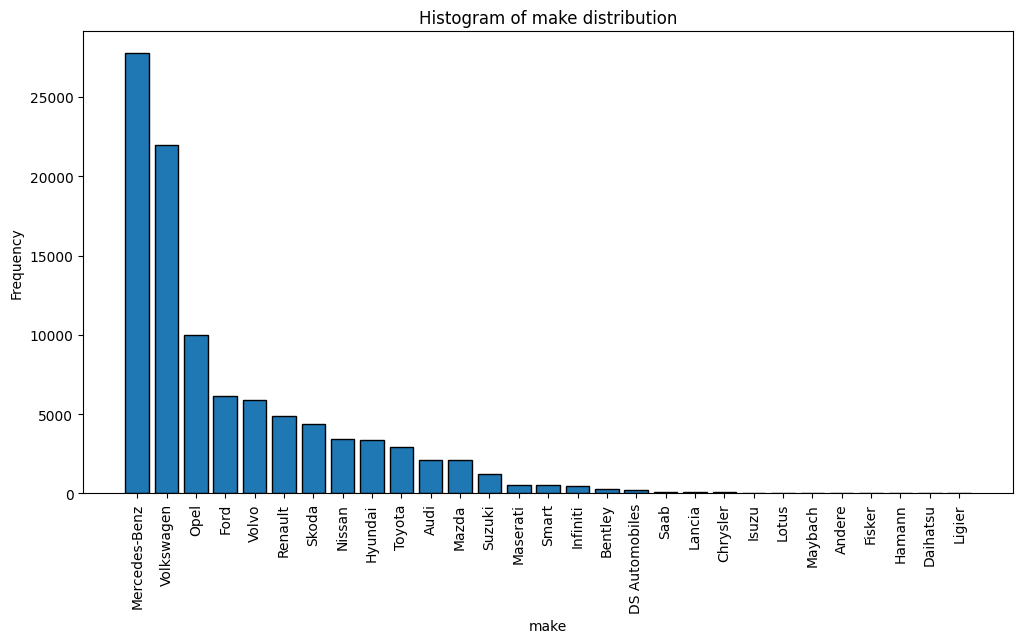

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(make_counts.index, make_counts.values, edgecolor='black')
ax.set_title('Histogram of make distribution')
plt.xticks(rotation=90)
ax.set_xlabel('make')
ax.set_ylabel('Frequency')
plt.show()

In [26]:
threshold = 1000  
top_make = train_data['make'].value_counts()[train_data['make'].value_counts() > threshold].index
train_data['make'] = train_data['make'].apply(lambda x: x if x in top_make else 'Other')
top_make


Index(['Mercedes-Benz', 'Volkswagen', 'Opel', 'Ford', 'Volvo', 'Renault',
       'Skoda', 'Nissan', 'Hyundai', 'Toyota', 'Audi', 'Mazda', 'Suzuki'],
      dtype='object', name='make')

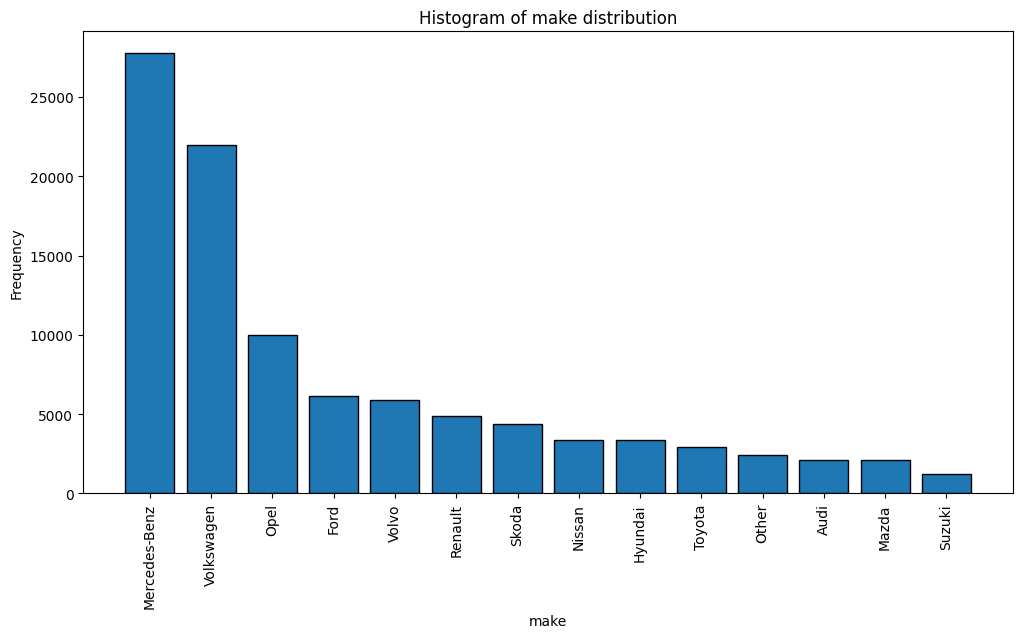

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(train_data['make'].value_counts().index, train_data['make'].value_counts().values, edgecolor='black')
ax.set_title('Histogram of make distribution')
plt.xticks(rotation=90)
ax.set_xlabel('make')
ax.set_ylabel('Frequency')
plt.show()

In [29]:
unique_make = train_data['make'].unique()
test_data['make'] = test_data['make'].apply(lambda x: x if x in unique_make else 'Other')
print(test_data['make'])

0              Nissan
1          Volkswagen
2              Nissan
3               Volvo
4             Hyundai
            ...      
9869    Mercedes-Benz
9870           Toyota
9871           Toyota
9872    Mercedes-Benz
9873           Suzuki
Name: make, Length: 9874, dtype: object


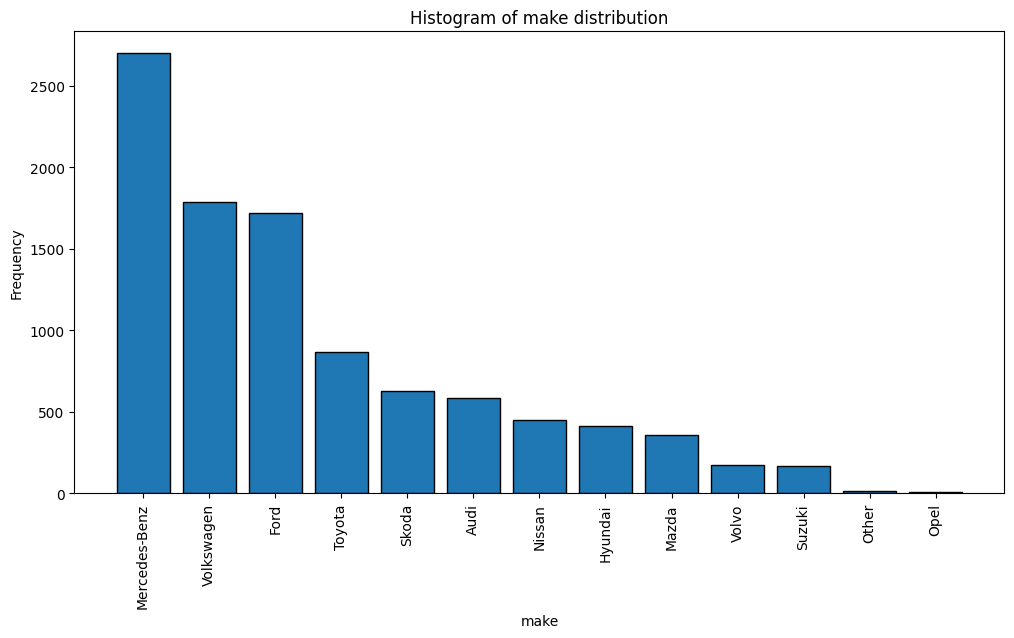

In [30]:

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(test_data['make'].value_counts().index, test_data['make'].value_counts().values, edgecolor='black')
ax.set_title('Histogram of make distribution')
plt.xticks(rotation=90)
ax.set_xlabel('make')
ax.set_ylabel('Frequency')
plt.show()



**Processing Erstzulassung**

In [32]:
train_data['Erstzulassung'].head()

0     5/2008
1     3/2008
2     6/2002
3     1/2003
4    11/2012
Name: Erstzulassung, dtype: object

In [33]:
def calculate_age(value,year,month):
    age_year = year - int(value.split('/')[1])
    age_month = month - int(value.split('/')[0])
    if age_month < 0:
        age_year -= 1
        age_month += 12
    return pd.Series([age_year, age_month])

In [34]:
train_data['Erstzulassung'].max()

'9/2018'

In [35]:
ref_date_train = train_data['Erstzulassung'].max()
year_train = int(ref_date_train.split('/')[1])
month_train = int(ref_date_train.split('/')[0])
train_available_date=pd.Timestamp(year_train,month_train,1)
train_data[['age_year', 'age_month']] = train_data['Erstzulassung'].apply(lambda x: calculate_age(x, year_train, month_train))
train_data['age']=train_data['age_year']*365+train_data['age_month']*30

ref_date_test=test_data['Erstzulassung'].max()
year_test = int(ref_date_test.split('/')[1])
month_test = int(ref_date_test.split('/')[0])
test_available_date=pd.Timestamp(year_test,month_test,1)
test_data[['age_year', 'age_month']] = test_data['Erstzulassung'].apply(lambda x: calculate_age(x, year_test, month_test))
test_data['age']=test_data['age_year']*365+test_data['age_month']*30

In [36]:
train_data['age']

0        3770
1        3830
2        5930
3        5715
4        2125
         ... 
98576    1060
98577    -185
98578    -185
98579    1030
98580    -185
Name: age, Length: 98581, dtype: int64

In [38]:
# Calculate IQR
def IQR(value):
    Q1=value.quantile(0.25)
    Q3=value.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound,upper_bound

In [39]:
train_data['age'].max()

np.int64(9125)

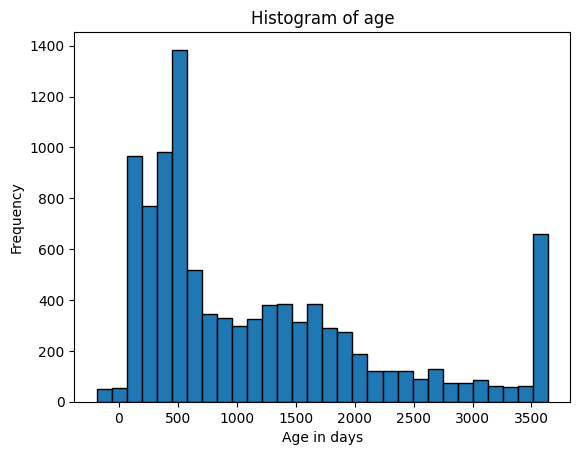

In [43]:
#histogram
fig, ax = plt.subplots()
ax.hist(test_data['age'], bins=30, edgecolor='black')
ax.set_title('Histogram of age')
ax.set_xlabel('Age in days')
ax.set_ylabel('Frequency')
plt.show()

In [41]:
train_lb_l,train_ub_l=IQR(train_data['age'])
test_lb_l,test_ub_l=IQR(test_data['age'])

train_data_filtered = train_data[(train_data['age'] >= train_lb_l) & (train_data['age'] <= train_ub_l)]
test_data['age'] = np.clip(test_data['age'], test_lb_l, test_ub_l)

train_data = train_data_filtered.copy()

train_data.reset_index(drop=True, inplace=True)

In [42]:
train_data.drop(columns=['Erstzulassung','age_year','age_month'],inplace=True)
test_data.drop(columns=['Erstzulassung','age_year','age_month'],inplace=True)

In [ ]:
train_data['age']

**Processing Leistung**

In [44]:
train_data['Leistung'].describe()

count    93036.000000
mean       173.039436
std         88.438566
min          0.000000
25%        120.000000
50%        150.000000
75%        190.000000
max        802.000000
Name: Leistung, dtype: float64

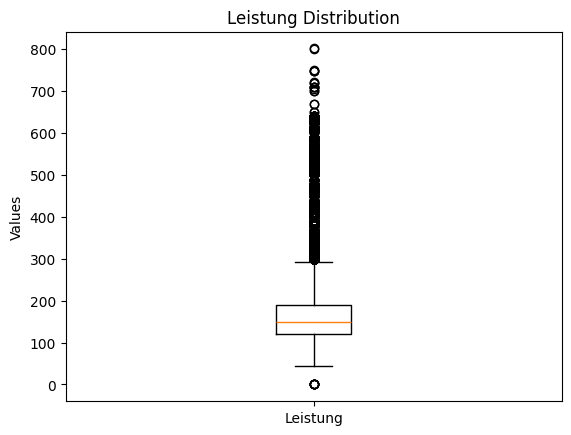

In [45]:
#boxplot
fig, ax = plt.subplots()
ax.boxplot(train_data['Leistung'])
ax.set_title('Leistung Distribution')
ax.set_xticklabels(['Leistung'])
ax.set_ylabel('Values')
plt.show()

In [47]:
train_lb_l,train_ub_l=IQR(train_data['Leistung'])
test_lb_l,test_ub_l=IQR(test_data['Leistung'])

train_data_filtered = train_data[(train_data['Leistung'] >= train_lb_l) & (train_data['Leistung'] <= train_ub_l)]
test_data['Leistung'] = np.clip(test_data['Leistung'], test_lb_l, test_ub_l)

train_data = train_data_filtered.copy()

train_data.reset_index(drop=True, inplace=True)

In [39]:
train_data['Leistung'].describe()

count    91031.000000
mean       153.065263
std         47.162104
min         41.000000
25%        117.000000
50%        150.000000
75%        179.000000
max        292.000000
Name: Leistung, dtype: float64

**Processing Kraftstoffart**

In [48]:
train_data['Kraftstoffart'].unique()

array(['Diesel', 'Hybrid (Diesel / Elektro)',
       'Hybrid (Benzin/Elektro), E10-geeignet', 'Benzin, E10-geeignet',
       'Benzin', 'Hybrid (Benzin/Elektro)', 'Diesel, Biodiesel geeignet',
       'Erdgas (CNG)', 'Hybrid (Diesel / Elektro), Plug-in-Hybrid',
       'Hybrid (Benzin/Elektro), Plug-in-Hybrid', 'Diesel, E10-geeignet',
       'Autogas (LPG)', 'Erdgas (CNG), Biodiesel geeignet, E10-geeignet',
       'Hybrid (Benzin/Elektro), E10-geeignet, Plug-in-Hybrid',
       'Hybrid, Plug-in-Hybrid', 'Diesel, Pflanzenöl geeignet',
       'Autogas (LPG), E10-geeignet', 'Erdgas (CNG), E10-geeignet',
       'Diesel, Biodiesel geeignet, Pflanzenöl geeignet',
       'Diesel, Plug-in-Hybrid', 'Benzin, E10-geeignet, Plug-in-Hybrid',
       'Benzin, Biodiesel geeignet', 'Benzin, Plug-in-Hybrid',
       'Benzin, Biodiesel geeignet, E10-geeignet', 'Andere',
       'Hybrid (Benzin/Elektro), Biodiesel geeignet',
       'Ethanol (FFV, E85 etc.)'], dtype=object)

In [49]:
train_data['primary_fuel']=train_data['Kraftstoffart'].str.split(',').str[0]
train_data['fuel_modifiers']=train_data['Kraftstoffart'].str.split(',').str[1:].apply(lambda x: ', '.join(x).strip() if x else 'None')

test_data['primary_fuel']=test_data['Kraftstoffart'].str.split(',').str[0]
test_data['fuel_modifiers']=test_data['Kraftstoffart'].str.split(',').str[1:].apply(lambda x: ', '.join(x).strip() if x else 'None')


In [50]:
train_data.drop(columns=['Kraftstoffart'],inplace=True)
test_data.drop(columns=['Kraftstoffart'],inplace=True)

In [51]:
train_data['fuel_modifiers'].unique()

array(['None', 'E10-geeignet', 'Biodiesel geeignet', 'Plug-in-Hybrid',
       'Biodiesel geeignet,  E10-geeignet',
       'E10-geeignet,  Plug-in-Hybrid', 'Pflanzenöl geeignet',
       'Biodiesel geeignet,  Pflanzenöl geeignet', 'E85 etc.)'],
      dtype=object)

In [52]:
train_data['primary_fuel'].unique()


array(['Diesel', 'Hybrid (Diesel / Elektro)', 'Hybrid (Benzin/Elektro)',
       'Benzin', 'Erdgas (CNG)', 'Autogas (LPG)', 'Hybrid', 'Andere',
       'Ethanol (FFV'], dtype=object)

In [53]:
train_data['fuel_modifiers'].isna().sum()

np.int64(0)

# **Filling the NA values in to the dataframe**

**Handling Missing Values in Colour**

In [54]:
train_data['colour'].unique()

array(['Schwarz Metallic', 'Grau Metallic', 'Schwarz', 'Blau Metallic',
       'Weiß', 'Grün Metallic', 'Beige Metallic', 'Weiß Metallic',
       'Silber Metallic', 'Braun Metallic', 'Blau', 'Violett Metallic',
       'Orange Metallic', 'Rot', 'Silber', 'Orange', 'Gelb Metallic',
       'Gelb', 'Rot Metallic', 'Gold Metallic', nan, 'Grau', 'Grün',
       'Braun', 'Gold', 'Beige', 'Violett'], dtype=object)

In [55]:
train_data['colour'].isna().sum()

np.int64(247)

In [56]:
train_data['colour']=train_data['colour'].fillna(train_data['colour'].mode().iloc[0])
test_data['colour']=test_data['colour'].fillna(test_data['colour'].mode().iloc[0])

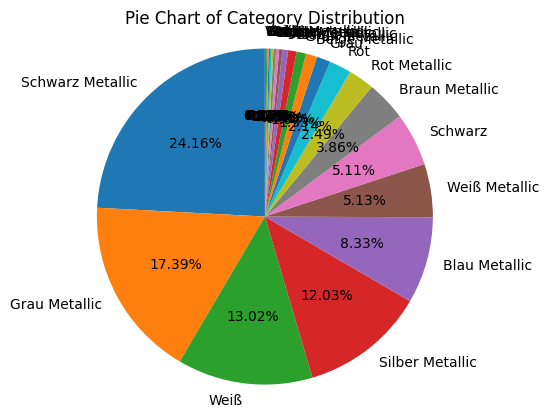

In [57]:
#Piechart
fig, ax = plt.subplots()
counts = train_data['colour'].value_counts()
ax.pie(counts, labels=counts.index, autopct='%.2f%%', startangle=90)
ax.set_title('Pie Chart of Category Distribution')
ax.axis('equal')
plt.show()

In [58]:
color_counts = train_data['colour'].value_counts()
print(color_counts)

colour
Schwarz Metallic    20638
Grau Metallic       14856
Weiß                11119
Silber Metallic     10279
Blau Metallic        7113
Weiß Metallic        4384
Schwarz              4363
Braun Metallic       3295
Rot Metallic         2124
Rot                  1830
Grau                 1133
Beige Metallic        918
Grün Metallic         776
Blau                  695
Orange Metallic       472
Gelb Metallic         262
Silber                243
Violett Metallic      222
Gelb                  139
Gold Metallic         129
Braun                 126
Grün                  104
Orange                 91
Beige                  85
Violett                19
Gold                    5
Name: count, dtype: int64


In [59]:
threshold = 1000 
top_colors = train_data['colour'].value_counts()[train_data['colour'].value_counts() > threshold].index
train_data['colour'] = train_data['colour'].apply(lambda x: x if x in top_colors else 'Other')


In [60]:
unique_colors = train_data['colour'].unique()
test_data['colour'] = test_data['colour'].apply(lambda x: x if x in unique_colors else 'Other')

**Handling Missing Values in Kilometerstand**

In [61]:
train_data['Kilometerstand'].describe()

count    79597.000000
mean        47.592445
std         51.879035
min          1.000000
25%         10.000000
50%         25.124000
75%         72.000000
max        557.771000
Name: Kilometerstand, dtype: float64

In [62]:
train_data['Kilometerstand'].tail()

85415      4.000
85416     50.133
85417    104.290
85418     17.700
85419     52.300
Name: Kilometerstand, dtype: float64

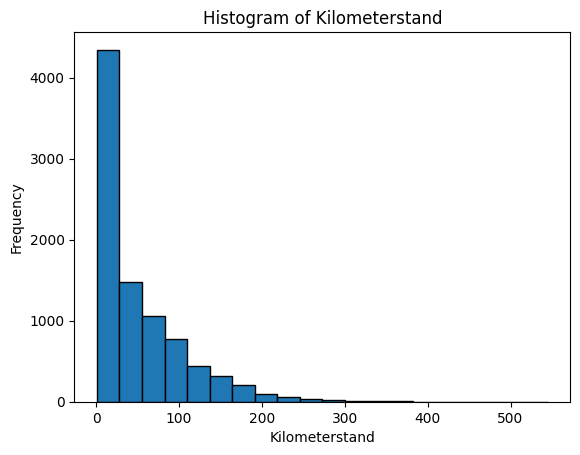

In [63]:

#histogram
fig, ax = plt.subplots()
ax.hist(test_data['Kilometerstand'], bins=20, edgecolor='black')
ax.set_title('Histogram of Kilometerstand')
ax.set_xlabel('Kilometerstand')
ax.set_ylabel('Frequency')
plt.show()


In [64]:
train_lb_k,train_ub_k=IQR(train_data['Kilometerstand'])
test_lb_k,test_ub_k=IQR(test_data['Kilometerstand'])

train_data['Kilometerstand'] = np.clip(train_data['Kilometerstand'], train_lb_k, train_ub_k)
test_data['Kilometerstand'] = np.clip(test_data['Kilometerstand'], test_lb_k, test_ub_k)


In [65]:
train_data['Kilometerstand'].describe()

count    79597.000000
mean        45.950216
std         46.426921
min          1.000000
25%         10.000000
50%         25.124000
75%         72.000000
max        165.000000
Name: Kilometerstand, dtype: float64

In [66]:
train_data['Kilometerstand'].isna().sum()

np.int64(5823)

In [67]:
train_data['Kilometerstand'] = train_data['Kilometerstand'].fillna(train_data['Kilometerstand'].median())
test_data['Kilometerstand'] = test_data['Kilometerstand'].fillna(test_data['Kilometerstand'].median())

**Handling Missing Values in Klimatisierung**

In [68]:
train_data['Klimatisierung'].unique()

array(['Klimaautomatik', 'Klimaanlage', '2-Zonen-Klimaautomatik',
       'Keine Klimaanlage oder -automatik', '3-Zonen-Klimaautomatik', nan,
       '4-Zonen-Klimaautomatik'], dtype=object)

In [69]:
train_data['Klimatisierung']=train_data['Klimatisierung'].fillna(train_data['Klimatisierung'].mode().iloc[0])
test_data['Klimatisierung']=test_data['Klimatisierung'].fillna(test_data['Klimatisierung'].mode().iloc[0])


**Handling Missing Values in Airbags**

In [70]:
train_data['Airbags'].unique()

array(['Front-, Seiten- und weitere Airbags', 'Front-Airbags',
       'Front- und Seiten-Airbags', 'Fahrer-Airbag', nan], dtype=object)

In [71]:
train_data['Airbags'] = train_data['Airbags'].replace({
    'Front-, Seiten- und weitere Airbags': 'Multiple',
    'Front- und Seiten-Airbags': 'Multiple',
    'Front-Airbags': 'Front',
    'Fahrer-Airbag': 'Driver'
})
test_data['Airbags'] = test_data['Airbags'].replace({
    'Front-, Seiten- und weitere Airbags': 'Multiple',
    'Front- und Seiten-Airbags': 'Multiple',
    'Front-Airbags': 'Front',
    'Fahrer-Airbag': 'Driver'
})

In [72]:
train_data['Airbags']=train_data['Airbags'].fillna(train_data['Airbags'].mode().iloc[0])
test_data['Airbags']=test_data['Airbags'].fillna(test_data['Airbags'].mode().iloc[0])

**Handling Missing Values in Verfügbarkeit**

In [73]:
train_data['Verfügbarkeit'].unique()

array([nan, 'Sofort', 'In 1 Tag ab Bestellung',
       'In 3 Tagen ab Bestellung', 'In 2 Tagen ab Bestellung',
       'In 5 Tagen ab Bestellung', 'In 3 Monaten ab Bestellung',
       'Ab 13.10.2018', 'Ab 16.04.2018', 'Ab 20.12.2017',
       'In 1 Woche ab Bestellung', 'Ab 10.12.2017', 'Ab 14.12.2017',
       'Ab 15.12.2017', 'Ab 12.01.2018', 'In 6 Tagen ab Bestellung',
       'Ab 09.05.2018', 'Ab 07.12.2017', 'In 6 Monaten ab Bestellung',
       'Ab 08.05.2018', 'Ab 03.01.2018', 'Ab 12.03.2018', 'Ab 04.04.2019',
       'Ab 15.05.2018', 'Ab 18.05.2018', 'Ab 14.02.2018',
       'In 4 Tagen ab Bestellung', 'Ab 10.05.2018', 'Ab 20.02.2018',
       'Ab 15.04.2018', 'Ab 21.02.2018', 'In 2 Monaten ab Bestellung',
       'Ab 16.03.2018', 'Ab 05.12.2017', 'In 6 Wochen ab Bestellung',
       'Ab 02.04.2018', 'Ab 15.03.2018', 'Ab 15.01.2018', 'Ab 18.12.2017',
       'In 2 Wochen ab Bestellung', 'Ab 30.12.2017', 'Ab 16.01.2018',
       'Ab 08.01.2018', 'Ab 14.06.2018', 'Ab 02.01.2018', 'Ab 13.12.2

In [75]:
def convertToExactValue(value):
    if pd.isna(value) or not isinstance(value, str):
        return None
    match = re.search(r'In (\d+) (Tagen|Wochen|Monaten|Tag|Woch|Monat)', value)
    if match:
        num = int(match.group(1))
        unit = match.group(2)
        if unit in ['Tagen', 'Tag']:
            return num  
        elif unit in ['Wochen', 'Woch']:
            return num * 7 
        elif unit in ['Monaten', 'Monat']:
            return num * 30
    return None

In [76]:
import re
def extract_date(value):
    if isinstance(value, str) and value.startswith('Ab'):
        date_match = re.search(r'Ab (\d{2}\.\d{2}\.\d{4})', value)
        if date_match:
            return pd.to_datetime(date_match.group(1), format='%d.%m.%Y')
    return None

In [77]:
import re
def changeIntoNumber(value,min_date):
    temp = value.reset_index(drop=True).to_frame(name='date')
    temp['absolute'] = temp['date'].apply(extract_date)
    temp['relative'] = temp['date'].apply(convertToExactValue)
    temp['absolute'] = temp['absolute'].combine_first(temp['date'].apply(lambda x: min_date if x == 'Sofort' else None))
    temp['combine'] = temp['relative'].combine_first((temp['absolute'] - min_date).dt.days)
    return temp['combine']  

train_data['availabilityDays'] = changeIntoNumber(train_data['Verfügbarkeit'],train_available_date)
test_data['availabilityDays'] = changeIntoNumber(test_data['Verfügbarkeit'],test_available_date)

In [78]:
train_data.drop(columns=['Verfügbarkeit'],inplace=True)
test_data.drop(columns=['Verfügbarkeit'],inplace=True)

In [69]:
test_data['availabilityDays'].describe()

count    5197.000000
mean       -7.474312
std        48.489104
min      -268.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1275.000000
Name: availabilityDays, dtype: float64

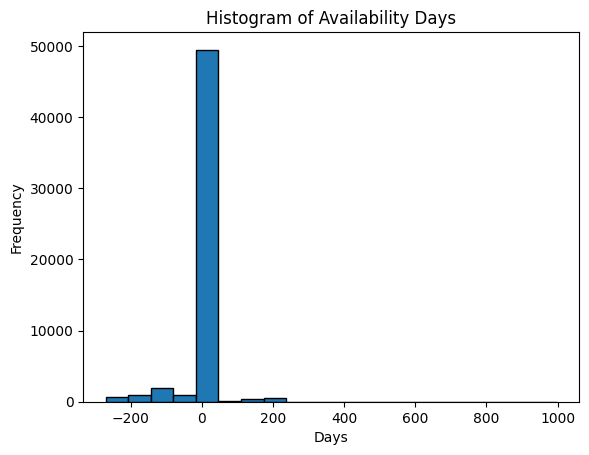

In [79]:

#histogram
fig, ax = plt.subplots()
ax.hist(train_data['availabilityDays'], bins=20, edgecolor='black')
ax.set_title('Histogram of Availability Days')
ax.set_xlabel('Days')
ax.set_ylabel('Frequency')
plt.show()

In [207]:
# train_lb_a,train_ub_a=IQR(train_data['availabilityDays'])
# test_lb_a,test_ub_a=IQR(test_data['availabilityDays'])

# train_data['availabilityDays'] = np.clip(train_data['availabilityDays'], train_lb_a, train_ub_a)
# test_data['availabilityDays'] = np.clip(test_data['availabilityDays'], test_lb_a, test_ub_a)

In [80]:
train_data['availabilityDays']=train_data['availabilityDays'].fillna(train_data['availabilityDays'].median())
test_data['availabilityDays']=test_data['availabilityDays'].fillna(test_data['availabilityDays'].median())

In [81]:
train_data['availabilityDays'].describe()

count    85420.000000
mean        -4.486151
std         38.807129
min       -270.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        997.000000
Name: availabilityDays, dtype: float64

In [69]:
# train_data.drop(columns=['availabilityDays'],inplace=True)
# test_data.drop(columns=['availabilityDays'],inplace=True)

**Handling Missing Values in Herkunft**

In [82]:
train_data['Herkunft'].unique()

array(['Deutsche Ausführung', nan, 'EU-Ausführung'], dtype=object)

In [83]:
train_data['Herkunft'] = train_data['Herkunft'].fillna(train_data['Herkunft'].mode().iloc[0])
test_data['Herkunft'] = test_data['Herkunft'].fillna(test_data['Herkunft'].mode().iloc[0])

**Handling Missing Values in Innenausstattung**

In [84]:
train_data['Innenausstattung'].unique()

array(['Alcantara, Schwarz', 'Vollleder, Schwarz', 'Stoff, Grau',
       'Stoff, Schwarz', 'Teilleder, Schwarz', 'Stoff, Braun',
       'Vollleder, Andere', 'Stoff, Andere', 'Teilleder, Grau',
       'Vollleder, Grau', 'Vollleder, Braun', 'Vollleder, Beige',
       'Andere, Braun', 'Andere, Andere', 'Alcantara, Grau',
       'Andere, Beige', 'Teilleder, Braun', 'Grau', 'Velours, Schwarz',
       'Andere, Schwarz', 'Stoff', 'Alcantara', 'Teilleder, Andere',
       'Schwarz', 'Vollleder', 'Alcantara, Andere', 'Stoff, Beige',
       'Teilleder', 'Teilleder, Beige', 'Andere, Grau',
       'Alcantara, Beige', 'Velours, Grau', 'Andere', nan,
       'Alcantara, Braun', 'Velours', 'Velours, Andere', 'Velours, Beige',
       'Velours, Braun', 'Beige', 'Braun'], dtype=object)

In [85]:
def convertInterior(value):
    interior_df = value.reset_index(drop=True).to_frame(name='Interior') 

    interior_df['Material'] = interior_df['Interior'].str.split(', ').str[0]
    interior_df['Color'] = interior_df['Interior'].str.split(', ').str[1]

    colors_only = ['Schwarz', 'Grau', 'Beige', 'Braun']

    interior_df['Color'] = interior_df.apply(lambda row: row['Material'] if row['Material'] in colors_only and pd.isna(row['Color']) else row['Color'], axis=1)
    interior_df['Color'] = interior_df.apply(lambda row: row['Material'] if row['Material'] in colors_only and row['Color'] == 'Unknown' else row['Color'], axis=1)

    interior_df['Material'] = interior_df.apply(lambda row: 'Unknown' if row['Material'] in colors_only else row['Material'], axis=1)

    interior_df['Material'] = interior_df['Material'].fillna('Unknown')
    interior_df['Color'] = interior_df['Color'].fillna('Unknown')
    return interior_df


In [86]:
interior_results_train = convertInterior(train_data['Innenausstattung'])
interior_results_test = convertInterior(test_data['Innenausstattung'])

train_data['Material']=interior_results_train['Material']
train_data['intColor']=interior_results_train['Color']

test_data['Material']=interior_results_test['Material']
test_data['intColor']=interior_results_test['Color']

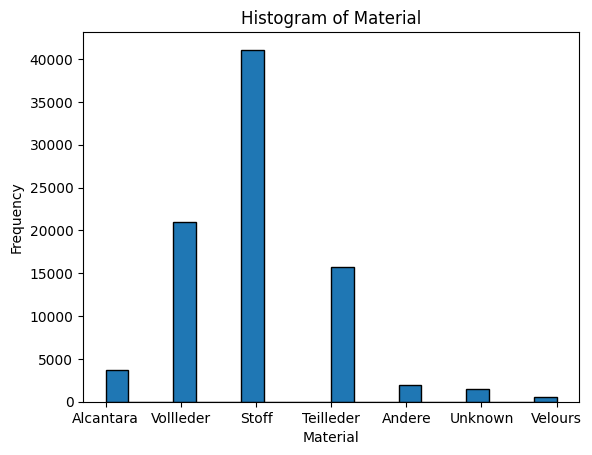

In [87]:

fig, ax = plt.subplots()
ax.hist(train_data['Material'], bins=20, edgecolor='black')
ax.set_title('Histogram of Material')
ax.set_xlabel('Material')
ax.set_ylabel('Frequency')
plt.show()

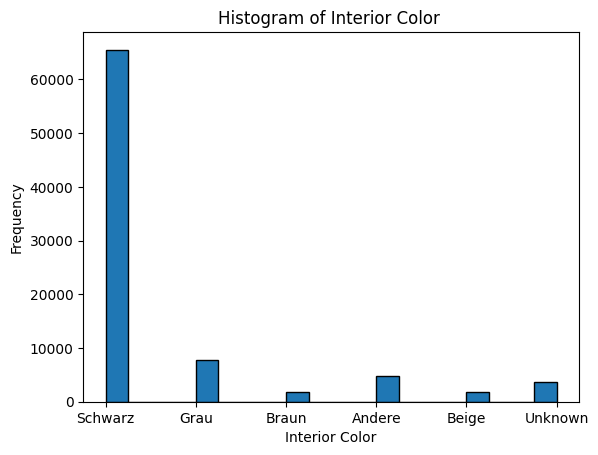

In [88]:

fig, ax = plt.subplots()
ax.hist(train_data['intColor'], bins=20, edgecolor='black')
ax.set_title('Histogram of Interior Color ')
ax.set_xlabel('Interior Color')
ax.set_ylabel('Frequency')
plt.show()

In [89]:
train_data.drop(columns=['Innenausstattung'],inplace=True)
test_data.drop(columns=['Innenausstattung'],inplace=True)

**Handling Missing Values in CO2-Emissionen**

In [90]:
train_data['CO2-Emissionen'].unique()

array(['≈\u2009246\u2009g/km (kombiniert)', '116\u2009g/km (kombiniert)*',
       '96\u2009g/km (kombiniert)*', '≈\u2009159\u2009g/km (kombiniert)',
       '≈\u2009113\u2009g/km (kombiniert)', '126\u2009g/km (kombiniert)*',
       '99\u2009g/km (kombiniert)*', '≈\u2009179\u2009g/km (kombiniert)',
       '≈\u2009132\u2009g/km (kombiniert)',
       '≈\u2009228\u2009g/km (kombiniert)', '162\u2009g/km (kombiniert)*',
       '≈\u2009202\u2009g/km (kombiniert)', '103\u2009g/km (kombiniert)*',
       '117\u2009g/km (kombiniert)*', '≈\u2009197\u2009g/km (kombiniert)',
       '≈\u2009114\u2009g/km (kombiniert)', '114\u2009g/km (kombiniert)*',
       '≈\u2009119\u2009g/km (kombiniert)', '109\u2009g/km (kombiniert)*',
       '205\u2009g/km (kombiniert)*', '149\u2009g/km (kombiniert)*',
       '137\u2009g/km (kombiniert)*', '≈\u2009166\u2009g/km (kombiniert)',
       '≈\u2009144\u2009g/km (kombiniert)', '138\u2009g/km (kombiniert)*',
       '184\u2009g/km (kombiniert)*', '119\u2009g/km (kombiniert

In [96]:
import re
import pandas as pd

def extract_numeric(value):
    if pd.isna(value): 
        return value
    match = re.search(r'[\d.]+', str(value))
    return float(match.group(0)) if match else None  

In [97]:
train_data['CO2-Emissionen'] = train_data['CO2-Emissionen'].apply(extract_numeric)
test_data['CO2-Emissionen'] = test_data['CO2-Emissionen'].apply(extract_numeric)

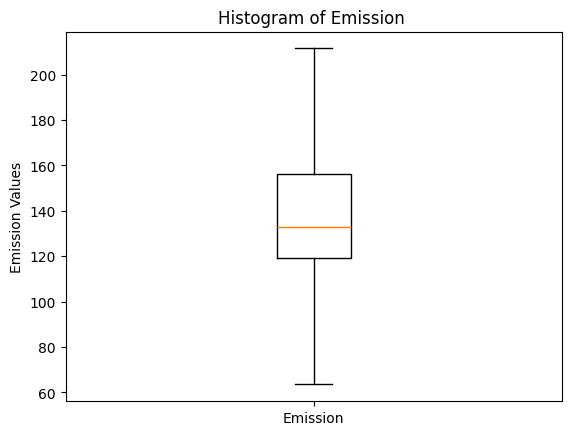

In [98]:
#boxplot
fig, ax = plt.subplots()
ax.boxplot(train_data['CO2-Emissionen'].dropna())
ax.set_title('Histogram of Emission ')
ax.set_ylabel('Emission Values')
ax.set_xticklabels(['Emission'])
plt.show()

In [99]:
train_lb,train_ub=IQR(train_data['CO2-Emissionen'])
test_lb,test_ub=IQR(test_data['CO2-Emissionen'])
train_data['CO2-Emissionen'] = np.clip(train_data['CO2-Emissionen'], train_lb, train_ub)
test_data['CO2-Emissionen'] = np.clip(test_data['CO2-Emissionen'], test_lb, test_ub)

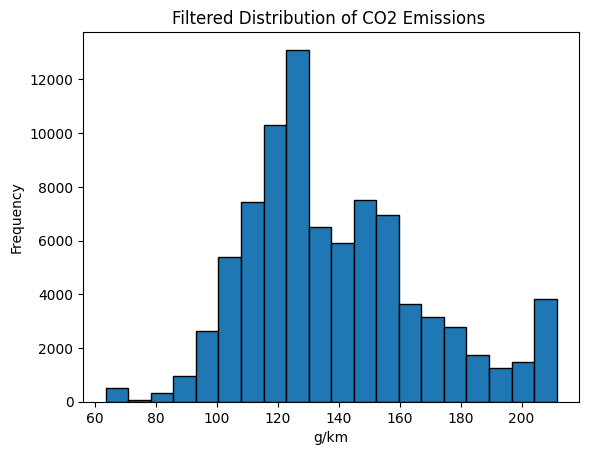

In [102]:

fig, ax = plt.subplots()
ax.hist(train_data['CO2-Emissionen'], bins=20, edgecolor='black')
ax.set_title('Filtered Distribution of CO2 Emissions ')
ax.set_xlabel('g/km')
ax.set_ylabel('Frequency')
plt.show()

In [103]:
train_median = train_data['CO2-Emissionen'].median()
test_median = test_data['CO2-Emissionen'].median()
train_data['CO2-Emissionen'] = train_data['CO2-Emissionen'].fillna(train_median)
test_data['CO2-Emissionen'] = test_data['CO2-Emissionen'].fillna(test_median)  # Use train median

**Handling Missing Values in Getriebe**

In [104]:
train_data['Getriebe'].unique()

array(['Automatik', 'Schaltgetriebe', nan, 'Halbautomatik'], dtype=object)

In [105]:
train_data['Getriebe'] = train_data['Getriebe'].fillna(train_data['Getriebe'].mode().iloc[0])
test_data['Getriebe'] = test_data['Getriebe'].fillna(test_data['Getriebe'].mode().iloc[0])

**Handling Missing Values in Verbrauch**

In [106]:
train_data['Verbrauch'].head()

0    ≈ 9,3 l/100km (kombiniert)≈ 12,2 l/100km (inne...
1    4,5 l/100km (kombiniert)*4,5 l/100km (innerort...
2    4,1 l/100km (kombiniert)*3,8 l/100km (innerort...
3    ≈ 6,1 l/100km (kombiniert)≈ 8,1 l/100km (inner...
4    ≈ 4,3 l/100km (kombiniert)≈ 4,9 l/100km (inner...
Name: Verbrauch, dtype: object

In [109]:
import re

def extract_fuel_consumption(value):
    if pd.isna(value):
        return None, None, None

    combined_match = re.search(r'≈?\s?([\d,.]+)\s?l/100km\s?\(kombiniert\)', value)
    inner_match = re.search(r'≈?\s?([\d,.]+)\s?l/100km\s?\(innerorts\)', value)
    outer_match = re.search(r'≈?\s?([\d,.]+)\s?l/100km\s?\(außerorts\)', value)

    combined = float(combined_match.group(1).replace(',', '.')) if combined_match else None
    inner = float(inner_match.group(1).replace(',', '.')) if inner_match else None
    outer = float(outer_match.group(1).replace(',', '.')) if outer_match else None

    return combined, inner, outer


In [110]:
results = train_data['Verbrauch'].apply(extract_fuel_consumption)
results_test = test_data['Verbrauch'].apply(extract_fuel_consumption)

train_data[['combined', 'inner', 'outer']] = pd.DataFrame(results.tolist(), index=train_data.index)
test_data[['combined', 'inner', 'outer']] = pd.DataFrame(results_test.tolist(), index=test_data.index)

In [111]:
train_data['outer'].describe()

count    83929.000000
mean         4.892849
std          1.149326
min          0.100000
25%          4.200000
50%          4.700000
75%          5.400000
max        105.000000
Name: outer, dtype: float64

In [112]:
train_lb_o,train_ub_o=IQR(train_data['outer'])
test_lb_o,test_ub_o=IQR(test_data['outer'])
train_data['outer'] = np.clip(train_data['outer'], train_lb_o, train_ub_o)
test_data['outer'] = np.clip(test_data['outer'], test_lb_o, test_ub_o)


In [113]:
train_data['inner'].describe()

count    83872.000000
mean         6.892359
std          2.034985
min          0.100000
25%          5.600000
50%          6.700000
75%          7.800000
max        131.000000
Name: inner, dtype: float64

In [114]:
train_lb_i,train_ub_i=IQR(train_data['inner'])
test_lb_i,test_ub_i=IQR(test_data['inner'])
train_data['inner'] = np.clip(train_data['inner'], train_lb_i, train_ub_i)
test_data['inner'] = np.clip(test_data['inner'], test_lb_i, test_ub_i)

In [115]:
train_data['combined'].describe()

count    85298.000000
mean         5.612985
std          1.411061
min          1.000000
25%          4.700000
50%          5.500000
75%          6.300000
max        115.000000
Name: combined, dtype: float64

In [116]:
train_lb_c,train_ub_c=IQR(train_data['combined'])
test_lb_c,test_ub_c=IQR(test_data['combined'])
train_data['combined'] = np.clip(train_data['combined'], train_lb_c, train_ub_c)
test_data['combined'] = np.clip(test_data['combined'], test_lb_c, test_ub_c)

In [117]:
train_medians = train_data[['combined', 'inner', 'outer']].median()
train_data[['combined', 'inner', 'outer']] = train_data[['combined', 'inner', 'outer']].fillna(train_medians)
test_medians = test_data[['combined', 'inner', 'outer']].median()
test_data[['combined', 'inner', 'outer']] = test_data[['combined', 'inner', 'outer']].fillna(test_medians)

In [118]:
train_data.drop(columns=['Verbrauch'],inplace=True)
test_data.drop(columns=['Verbrauch'],inplace=True)

<Figure size 800x600 with 0 Axes>

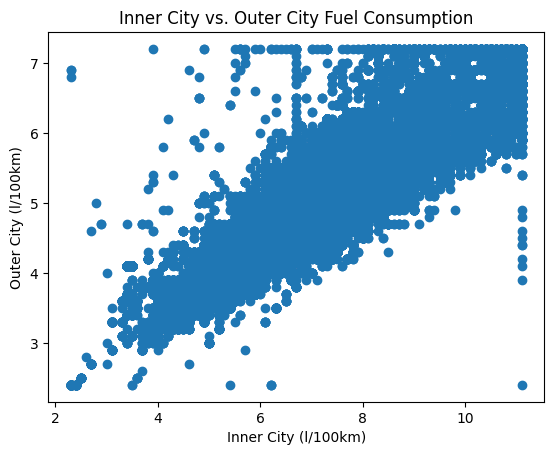

In [119]:
plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()
ax.scatter(train_data['inner'], train_data['outer'])
ax.set_title('Inner City vs. Outer City Fuel Consumption')
ax.set_xlabel('Inner City (l/100km)')
ax.set_ylabel('Outer City (l/100km)')
plt.show()



**Handling Missing Values in Schadstoffklasse**

In [120]:
train_data['Schadstoffklasse'].unique()

array(['Euro4', 'Euro5', 'Euro6', nan, 'Euro6d-TEMP', 'Euro6c', 'Euro3',
       'Euro6d'], dtype=object)

In [121]:
train_data['Schadstoffklasse'] = train_data['Schadstoffklasse'].replace(['Euro6d-TEMP', 'Euro6c', 'Euro6d'],'Euro6')
test_data['Schadstoffklasse'] = test_data['Schadstoffklasse'].replace(['Euro6d-TEMP', 'Euro6c', 'Euro6d'],'Euro6')



In [122]:
print(train_data['Schadstoffklasse'].unique())

['Euro4' 'Euro5' 'Euro6' nan 'Euro3']


In [123]:
train_data['Schadstoffklasse'] = train_data['Schadstoffklasse'].fillna(train_data['Schadstoffklasse'].mode().iloc[0])
test_data['Schadstoffklasse'] = test_data['Schadstoffklasse'].fillna(test_data['Schadstoffklasse'].mode().iloc[0])

**Handling Missing Values in Hubraum**

In [137]:
train_data['Hubraum'].head()

0    2.987 cm³
1    2.143 cm³
2    1.798 cm³
3    2.295 cm³
4    2.143 cm³
Name: Hubraum, dtype: object

In [124]:
import pandas as pd

def clean_engine_displacement(value):
    if pd.isna(value):  
        return value
    value = value.replace('\xa0', '').replace(',', '.')
    try:
        return float(value.replace('cm³', '').strip())
    except ValueError:
        return None 


In [125]:
train_data['Hubraum'] = train_data['Hubraum'].apply(clean_engine_displacement)
test_data['Hubraum'] = test_data['Hubraum'].apply(clean_engine_displacement)

In [126]:
train_data['Hubraum'].describe()

count    85392.000000
mean        65.060307
std        241.792850
min          1.000000
25%          1.591000
50%          1.968000
75%          2.143000
max        999.000000
Name: Hubraum, dtype: float64

In [127]:
train_lb_h,train_ub_h=IQR(train_data['Hubraum'])
test_lb_h,test_ub_h=IQR(test_data['Hubraum'])
train_data['Hubraum'] = np.clip(train_data['Hubraum'], train_lb_h, train_ub_h)
test_data['Hubraum'] = np.clip(test_data['Hubraum'], test_lb_h, test_ub_h)

In [128]:
train_data['Hubraum'] = train_data['Hubraum'].fillna(train_data['Hubraum'].median())
test_data['Hubraum'] = test_data['Hubraum'].fillna(test_data['Hubraum'].median())

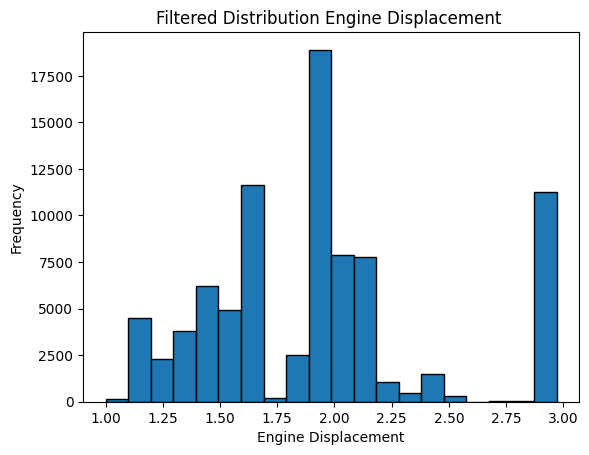

In [129]:

fig, ax = plt.subplots()
ax.hist(train_data['Hubraum'], bins=20, edgecolor='black')
ax.set_title('Filtered Distribution Engine Displacement ')
ax.set_xlabel('Engine Displacement')
ax.set_ylabel('Frequency')
plt.show()

In [130]:
train_data.describe()

,price,Kilometerstand,Leistung,CO2-Emissionen,Hubraum,Anzahl Sitzplätze,age,availabilityDays,combined,inner,outer
count,85420.000000,85420.000000,85420.000000,85420.000000,85420.000000,78223.000000,85420.000000,85420.000000,85420.000000,85420.000000,85420.000000
mean,24463.237696,44.530513,151.788703,139.088000,1.924918,5.128019,1082.068778,-4.486151,5.592749,6.849844,4.869044
std,13752.187293,45.122872,45.723176,29.595571,0.505627,0.965091,923.247672,38.807129,1.176737,1.642774,0.907987
min,1490.000000,1.000000,45.000000,63.500000,1.000000,1.000000,-185.000000,-270.000000,2.300000,2.300000,2.400000
25%,14850.000000,11.000000,117.000000,119.000000,1.591000,5.000000,395.000000,0.000000,4.700000,5.600000,4.200000
50%,20990.000000,25.124000,150.000000,133.000000,1.968000,5.000000,695.000000,0.000000,5.500000,6.700000,4.700000
75%,29999.000000,67.455750,179.000000,156.000000,2.143000,5.000000,1610.000000,0.000000,6.300000,7.800000,5.400000
max,168890.000000,165.000000,272.000000,211.500000,2.971000,67.000000,3860.000000,997.000000,8.700000,11.100000,7.200000


**Handling Missing Values in Anzahl Sitzplätze**

In [132]:
train_data['Anzahl Sitzplätze'].unique()

array([ 5.,  7., nan,  4.,  3.,  8.,  2.,  6.,  9., 10.,  1., 17., 67.])

In [133]:
train_data['Anzahl Sitzplätze'].describe()

count    78223.000000
mean         5.128019
std          0.965091
min          1.000000
25%          5.000000
50%          5.000000
75%          5.000000
max         67.000000
Name: Anzahl Sitzplätze, dtype: float64

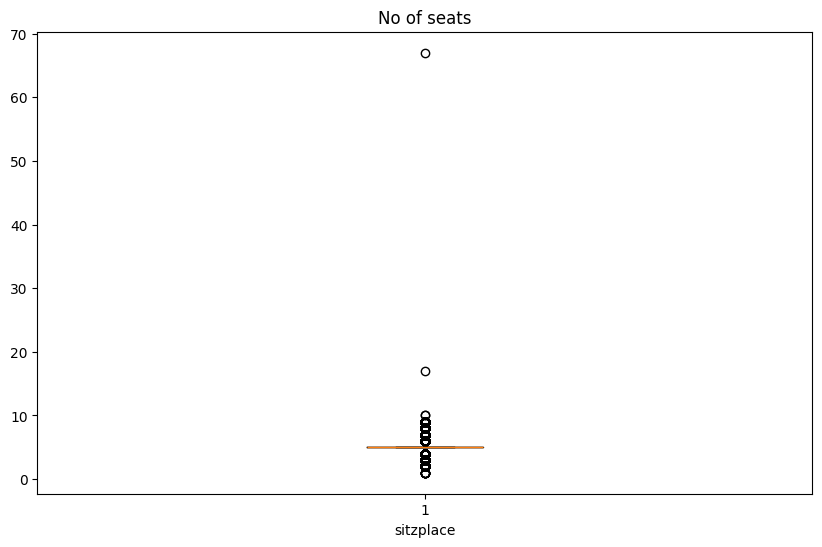

In [134]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot(train_data['Anzahl Sitzplätze'].dropna())

plt.title('No of seats')
plt.xlabel('sitzplace')
plt.show()

In [135]:
train_lb_s,train_ub_s=IQR(train_data['Anzahl Sitzplätze'])
test_lb_s,test_ub_s=IQR(test_data['Anzahl Sitzplätze'])
train_data['Anzahl Sitzplätze'] = np.clip(train_data['Anzahl Sitzplätze'], train_lb_s, train_ub_s)
test_data['Anzahl Sitzplätze'] = np.clip(test_data['Anzahl Sitzplätze'], test_lb_s, test_ub_s)

In [136]:
train_data['Anzahl Sitzplätze']=train_data['Anzahl Sitzplätze'].fillna(train_data['Anzahl Sitzplätze'].median())
test_data['Anzahl Sitzplätze']=test_data['Anzahl Sitzplätze'].fillna(test_data['Anzahl Sitzplätze'].median())

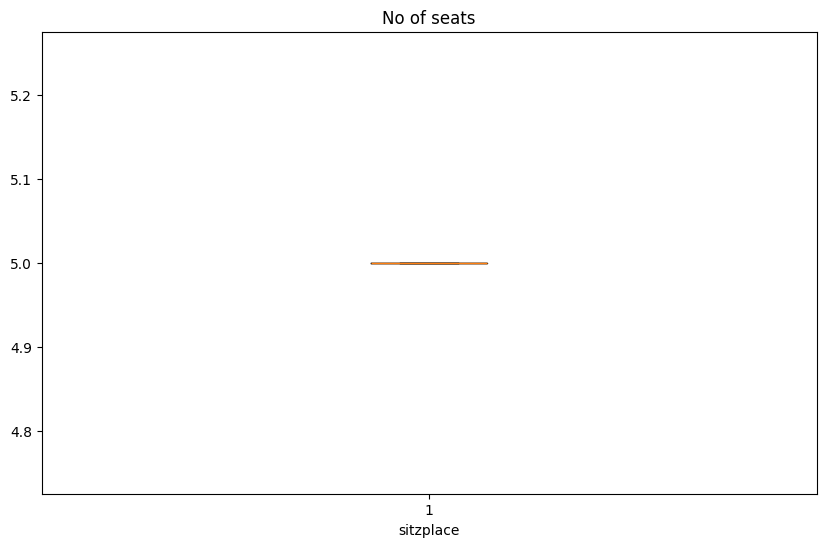

In [137]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot(train_data['Anzahl Sitzplätze'].dropna())

plt.title('No of seats')
plt.xlabel('sitzplace')
plt.show()

In [138]:
train_data.describe()

,price,Kilometerstand,Leistung,CO2-Emissionen,Hubraum,Anzahl Sitzplätze,age,availabilityDays,combined,inner,outer
count,85420.000000,85420.000000,85420.000000,85420.000000,85420.000000,85420.0,85420.000000,85420.000000,85420.000000,85420.000000,85420.000000
mean,24463.237696,44.530513,151.788703,139.088000,1.924918,5.0,1082.068778,-4.486151,5.592749,6.849844,4.869044
std,13752.187293,45.122872,45.723176,29.595571,0.505627,0.0,923.247672,38.807129,1.176737,1.642774,0.907987
min,1490.000000,1.000000,45.000000,63.500000,1.000000,5.0,-185.000000,-270.000000,2.300000,2.300000,2.400000
25%,14850.000000,11.000000,117.000000,119.000000,1.591000,5.0,395.000000,0.000000,4.700000,5.600000,4.200000
50%,20990.000000,25.124000,150.000000,133.000000,1.968000,5.0,695.000000,0.000000,5.500000,6.700000,4.700000
75%,29999.000000,67.455750,179.000000,156.000000,2.143000,5.0,1610.000000,0.000000,6.300000,7.800000,5.400000
max,168890.000000,165.000000,272.000000,211.500000,2.971000,5.0,3860.000000,997.000000,8.700000,11.100000,7.200000


**Handling Missing Values in Anzahl der Türen**

In [139]:
train_data['Anzahl der Türen'].unique()

array([nan, '4/5', '2/3', '6/7'], dtype=object)

In [141]:
door_mapping = {
    '2/3': 2.5,  
    '4/5': 4.5, 
    '6/7': 6.5   
}
train_data['Anzahl der Türen'] = train_data['Anzahl der Türen'].map(door_mapping)
test_data['Anzahl der Türen'] = test_data['Anzahl der Türen'].map(door_mapping)

In [142]:
train_data['Anzahl der Türen'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Anzahl der Türen, dtype: float64

In [149]:
train_lb_t,train_ub_t=IQR(train_data['Anzahl der Türen'])
test_lb_t,test_ub_t=IQR(test_data['Anzahl der Türen'])
train_data['Anzahl der Türen'] = np.clip(train_data['Anzahl der Türen'], train_lb_t, train_ub_t)
test_data['Anzahl der Türen'] = np.clip(test_data['Anzahl der Türen'], test_lb_t, test_ub_t)

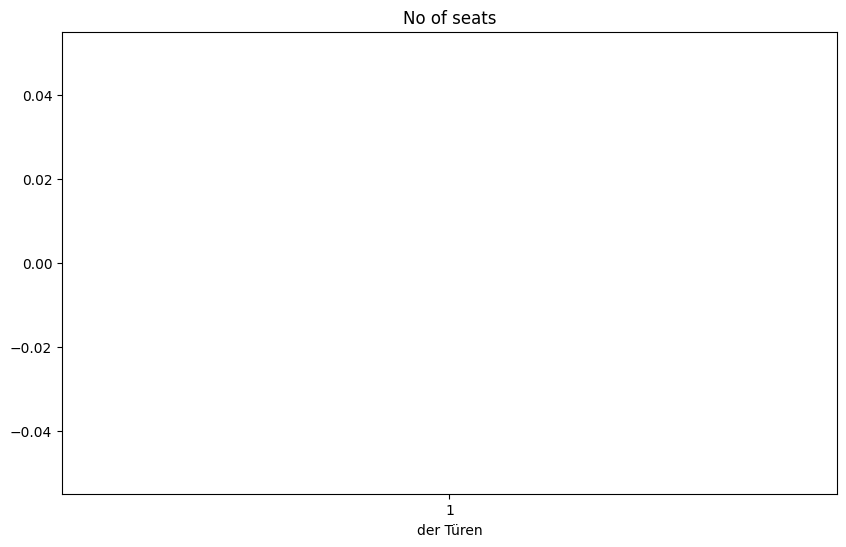

In [150]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.boxplot(train_data['Anzahl der Türen'].dropna())

plt.title('No of seats')
plt.xlabel('der Türen')
plt.show()

In [161]:
train_data['Anzahl der Türen'].isna().sum()

np.int64(85420)

In [162]:
train_data['Anzahl der Türen']=train_data['Anzahl der Türen'].fillna(0)
test_data['Anzahl der Türen']=test_data['Anzahl der Türen'].fillna(0)



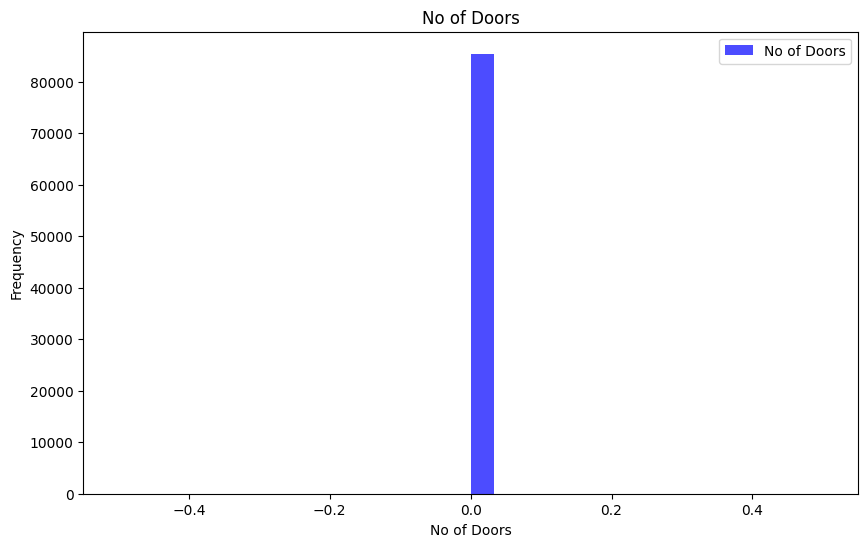

In [163]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(train_data['Anzahl der Türen'], bins=30, color='blue', alpha=0.7, label='No of Doors')
plt.title('No of Doors')
plt.xlabel('No of Doors')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [160]:
train_data['Anzahl der Türen']=train_data['Anzahl der Türen'].fillna(train_data['Anzahl der Türen'].mode().iloc[0])
test_data['Anzahl der Türen']=test_data['Anzahl der Türen'].fillna(test_data['Anzahl der Türen'].mode().iloc[0])

In [164]:
train_data.describe()

,price,Kilometerstand,Leistung,CO2-Emissionen,Hubraum,Anzahl Sitzplätze,Anzahl der Türen,age,availabilityDays,combined,inner,outer
count,85420.000000,85420.000000,85420.000000,85420.000000,85420.000000,85420.0,85420.0,85420.000000,85420.000000,85420.000000,85420.000000,85420.000000
mean,24463.237696,44.530513,151.788703,139.088000,1.924918,5.0,0.0,1082.068778,-4.486151,5.592749,6.849844,4.869044
std,13752.187293,45.122872,45.723176,29.595571,0.505627,0.0,0.0,923.247672,38.807129,1.176737,1.642774,0.907987
min,1490.000000,1.000000,45.000000,63.500000,1.000000,5.0,0.0,-185.000000,-270.000000,2.300000,2.300000,2.400000
25%,14850.000000,11.000000,117.000000,119.000000,1.591000,5.0,0.0,395.000000,0.000000,4.700000,5.600000,4.200000
50%,20990.000000,25.124000,150.000000,133.000000,1.968000,5.0,0.0,695.000000,0.000000,5.500000,6.700000,4.700000
75%,29999.000000,67.455750,179.000000,156.000000,2.143000,5.0,0.0,1610.000000,0.000000,6.300000,7.800000,5.400000
max,168890.000000,165.000000,272.000000,211.500000,2.971000,5.0,0.0,3860.000000,997.000000,8.700000,11.100000,7.200000


# Viewing Cleaned Data

In [165]:
print(test_data.shape)

(9874, 26)


In [167]:
train_data.columns,train_data.shape

(Index(['price', 'Kategorie', 'colour', 'Kilometerstand', 'Leistung', 'make',
        'model', 'Klimatisierung', 'Airbags', 'Herkunft', 'CO2-Emissionen',
        'Getriebe', 'Schadstoffklasse', 'Hubraum', 'Anzahl Sitzplätze',
        'Anzahl der Türen', 'primary_vehicle_type', 'descriptor', 'age',
        'primary_fuel', 'fuel_modifiers', 'availabilityDays', 'Material',
        'intColor', 'combined', 'inner', 'outer'],
       dtype='object'),
 (85420, 27))

In [168]:
missing_percentage = (test_data.isna().sum() / len(test_data)) * 100
print(missing_percentage)

Kategorie               0.0
colour                  0.0
Kilometerstand          0.0
Leistung                0.0
make                    0.0
model                   0.0
Klimatisierung          0.0
Airbags                 0.0
Herkunft                0.0
CO2-Emissionen          0.0
Getriebe                0.0
Schadstoffklasse        0.0
Hubraum                 0.0
Anzahl Sitzplätze       0.0
Anzahl der Türen        0.0
primary_vehicle_type    0.0
descriptor              0.0
age                     0.0
primary_fuel            0.0
fuel_modifiers          0.0
availabilityDays        0.0
Material                0.0
intColor                0.0
combined                0.0
inner                   0.0
outer                   0.0
dtype: float64


# Random Forest Regressor

In [10]:
X = train_data.drop(columns=['price'])  
y = train_data['price']  

In [9]:
categorical_columns = ['Kategorie', 'colour','make','model','Klimatisierung','Airbags','Herkunft',  'Getriebe',
                       'Schadstoffklasse', 'primary_vehicle_type', 'descriptor', 'primary_fuel', 
                       'fuel_modifiers', 'Material','intColor']
numerical_columns = ['Kilometerstand', 'Leistung', 'CO2-Emissionen', 'Hubraum',
                     'Anzahl Sitzplätze', 'Anzahl der Türen', 'age', 'availabilityDays',
                     'combined', 'inner', 'outer']
X_train = pd.get_dummies(X, columns=categorical_columns, drop_first=True)



KeyError: "['primary_vehicle_type', 'descriptor', 'primary_fuel', 'fuel_modifiers', 'Material', 'intColor'] not in index"

In [173]:
import json
numerical_columns_dict={}
numerical_columns = ['Kilometerstand', 'Leistung', 'CO2-Emissionen', 'Hubraum',
                     'Anzahl Sitzplätze', 'Anzahl der Türen', 'age', 'availabilityDays',
                     'combined', 'inner', 'outer']
for _ in numerical_columns:
    min_,max_=X_train[_].min(), X_train[_].max()
    numerical_columns_dict[_]=(float(min_), float(max_))

with open("numercial_values.json", "w") as f:
    json.dump(numerical_columns_dict, f)

In [174]:
feature_names = X_train.columns.tolist()

with open("feature_names.json", "w") as f:
    json.dump(feature_names, f)

In [175]:
from sklearn.ensemble import RandomForestRegressor
from joblib import dump

rf_regressor = RandomForestRegressor(n_estimators=200, random_state=42)
rf_regressor.fit(X_train, y)
dump(rf_regressor, "car_price_model.joblib")


['car_price_model.joblib']

In [176]:
X_test = pd.get_dummies(test_data, columns=categorical_columns, drop_first=True)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [22]:
X.iloc[[0]]

,adId,Kategorie,Erstzulassung,colour,Kilometerstand,Leistung,Kraftstoffart,make,model,sellerType,...,Schadstoffklasse,Hubraum,Zugr.-lgd. Treibstoffart,Anzahl Sitzplätze,Fahrzeugnummer,Anzahl der Türen,HU,Umweltplakette,Fahrzeugzustand,Einparkhilfe
0,144230675,Cabrio / Roadster,5/2008,Silber Metallic,47.959,525,Benzin,Mercedes-Benz,SL 63 AMG,DEALER,...,Euro4,6.208 cm³,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y, rf_regressor.predict(X_train))
print(f"Validation MAE: {mae}")

Validation MAE: 649.8962005438409


In [178]:
dict1={}
for cat in categorical_columns:
    #print(cat)
    dict1[cat]=X[cat].unique().tolist()

In [179]:
import json
with open("categorical_values.json", "w") as f:
    json.dump(dict1, f)

In [191]:
X_train.head()

,Kilometerstand,Leistung,CO2-Emissionen,Hubraum,Anzahl Sitzplätze,Anzahl der Türen,age,availabilityDays,combined,inner,...,Material_Stoff,Material_Teilleder,Material_Unknown,Material_Velours,Material_Vollleder,intColor_Beige,intColor_Braun,intColor_Grau,intColor_Schwarz,intColor_Unknown
0,165.000,224,211.5,2.971,5.0,0.0,3830,0.0,8.7,11.1,...,False,False,False,False,False,False,False,False,True,False
1,89.000,204,116.0,2.143,5.0,0.0,2125,0.0,4.5,4.5,...,False,False,False,False,True,False,False,False,True,False
2,59.890,136,96.0,1.798,5.0,0.0,2095,0.0,4.1,3.8,...,True,False,False,False,False,False,False,True,False,False
3,129.000,204,159.0,2.143,5.0,0.0,2980,0.0,6.1,8.1,...,False,False,False,False,True,False,False,False,True,False
4,14.578,105,113.0,1.600,5.0,0.0,2005,0.0,4.3,4.9,...,True,False,False,False,False,False,False,False,True,False
